# Decision Trees

* like SVMs ;can perform both (Classification and Regression)
* the fundamental components of Random Forests

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=3,criterion='gini')
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

> *max_depth* : This determines the maximum depth of the tree. In our case, we use a depth of two to make our decision tree. The default value is set to none. 

>*gini attribute* show a node is pure(gini=0)if all instance it applies to belong to the same class, 

> ex : value = [0, 49, 5]
gini score = 1-(0/54)^2 -(49/54)^2 -(5/54)^2 = 0.168

> or can use *entropy attribute* : concept from thermodynamics will approaches zero when molecules are still and ordered, an information theory metric that measures the impurity or uncertainty in a group of observations.

**Gini impurity** is slightly faster to compute, so it is a good default. However, when
they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while **entropy** tends to produce slightly more balanced trees.

visualize the trained Decision Tree by *export_graphviz()*

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file= 'iris_data.dot',
    feature_names= iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

> copy .dot file in [Graphviz](http://webgraphviz.com/)

> Scikit-learn using the CART algorithm which produce only binary tree(yes or no), other algorithms such as ID3 cn have more than two children.

In [3]:
print(tree_clf.predict_proba([[5,1.5]]))
print(tree_clf.predict([[5,1.5]]))

[[0.         0.33333333 0.66666667]]
[2]


## Regression 

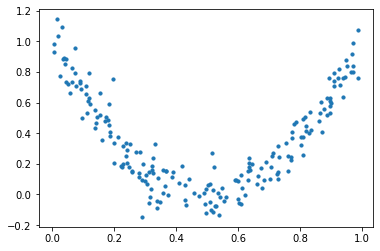

In [19]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.rand(200, 1)
y = 4 * (X - 0.5) ** 2 + np.random.randn(200, 1) / 10

plt.scatter(X,y,s=10);

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=3)

In [33]:
export_graphviz(
    tree_reg,
    out_file= 'reg.dot',
    rounded=False,
    filled=True
)

print('MAE :',mean_absolute_error(y,tree_reg.predict(y)))

MAE : 0.4861885357398167


## Using with GridSearch

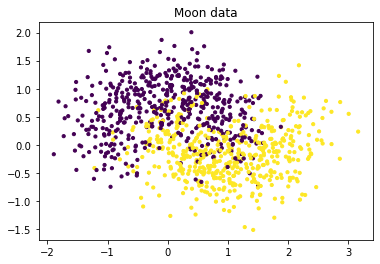

In [14]:
from sklearn.datasets import make_moons

X, y = make_moons(1000, noise=.4, random_state=42)
plt.scatter(X[:,0],X[:,1],s=10,c=y)
plt.title('Moon data');

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train.shape

(800, 2)

In [60]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_leaf_nodes':list(range(2,100)),
    'min_samples_split':[2,3,4],
}

tree_search = GridSearchCV(DecisionTreeClassifier(random_state=1) ,params,verbose=1,cv=3)
tree_search.fit(X_train, y_train)



Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [61]:
tree_search.best_params_

{'max_leaf_nodes': 4, 'min_samples_split': 2}

By default, GridSearchCV trains the best model found on the whole training set (you can change this by setting refit=False), so we don't need to do it again. We can simply evaluate the model's accuracy:

In [63]:
from sklearn.metrics import accuracy_score

y_pred = tree_search.predict(X_test)
print('accuracy : ',accuracy_score(y_test, y_pred))

accuracy :  0.855
